In [1]:
!pip install missingno

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 

In [ ]:
df = pd.read_csv('./fpl_playerstats_2024-25.csv')  
# The line in red is the copied path^^ 
df.head() # This shows you the first 5 rows of the table!

,id,player_cost,first_name,second_name,player_form,status,minutes,player_position,goals_scored,assists,...,red_cards,gw1_points,gw2_points,gw3_points,gw4_points,gw5_points,team_name,team_form,team_strength,total_points
0,1,5.4,Fábio,Ferreira Vieira,0.0,Unavailable,0,MID,0,0,...,0,0.0,0.0,0.0,0.0,0.0,Arsenal,NaN,5,0.0
1,2,6.8,Gabriel,Fernando de Jesus,0.3,Available,18,FWD,0,0,...,0,0.0,0.0,0.0,1.0,0.0,Arsenal,NaN,5,1.0
2,3,6.1,Gabriel,dos Santos Magalhães,8.0,Available,450,DEF,2,0,...,0,6.0,6.0,2.0,15.0,7.0,Arsenal,NaN,5,36.0
3,4,8.1,Kai,Havertz,4.0,Available,450,FWD,2,1,...,0,12.0,2.0,8.0,2.0,2.0,Arsenal,NaN,5,26.0
4,5,4.0,Karl,Hein,0.0,Unavailable,0,GKP,0,0,...,0,0.0,0.0,0.0,0.0,0.0,Arsenal,NaN,5,0.0


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       661 non-null    int64  
 1   player_cost              661 non-null    float64
 2   first_name               661 non-null    object 
 3   second_name              661 non-null    object 
 4   player_form              661 non-null    float64
 5   status                   661 non-null    object 
 6   minutes                  661 non-null    int64  
 7   player_position          661 non-null    object 
 8   goals_scored             661 non-null    int64  
 9   assists                  661 non-null    int64  
 10  clean_sheets             661 non-null    int64  
 11  expected_goals           661 non-null    float64
 12  expected_assists         661 non-null    float64
 13  goals_conceded           661 non-null    int64  
 14  expected_goals_conceded  6

In [6]:
df.describe() 

,id,player_cost,player_form,minutes,goals_scored,assists,clean_sheets,expected_goals,expected_assists,goals_conceded,...,yellow_cards,red_cards,gw1_points,gw2_points,gw3_points,gw4_points,gw5_points,team_form,team_strength,total_points
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,...,661.000000,661.000000,616.000000,627.000000,648.000000,659.000000,661.000000,0.0,661.000000,661.000000
mean,331.000000,4.999092,1.194554,148.954614,0.201210,0.183056,0.397882,0.216989,0.153933,2.263238,...,0.390318,0.009077,1.316558,1.366826,1.140432,1.235205,1.211800,NaN,3.114977,6.084720
std,190.958547,1.053062,1.783791,169.273218,0.698742,0.543349,0.818681,0.507937,0.321295,3.003078,...,0.697721,0.094913,2.266501,2.612831,2.174114,2.335969,2.325859,NaN,0.767978,8.431835
min,1.000000,4.000000,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,NaN,2.000000,0.000000
25%,166.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,0.000000
50%,331.000000,4.800000,0.300000,65.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,2.000000
75%,496.000000,5.300000,1.700000,299.000000,0.000000,0.000000,1.000000,0.190000,0.140000,4.000000,...,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,NaN,3.000000,9.000000
max,661.000000,15.300000,13.000000,450.000000,10.000000,5.000000,5.000000,5.690000,2.860000,14.000000,...,3.000000,1.000000,14.000000,20.000000,17.000000,15.000000,16.000000,NaN,5.000000,63.000000


In [13]:
d = df.isnull().sum() 
d = d[d>0]
print(d)


gw1_points     45
gw2_points     34
gw3_points     13
gw4_points      2
team_form     661
dtype: int64


In [15]:
df.shape

(661, 32)

<Axes: >

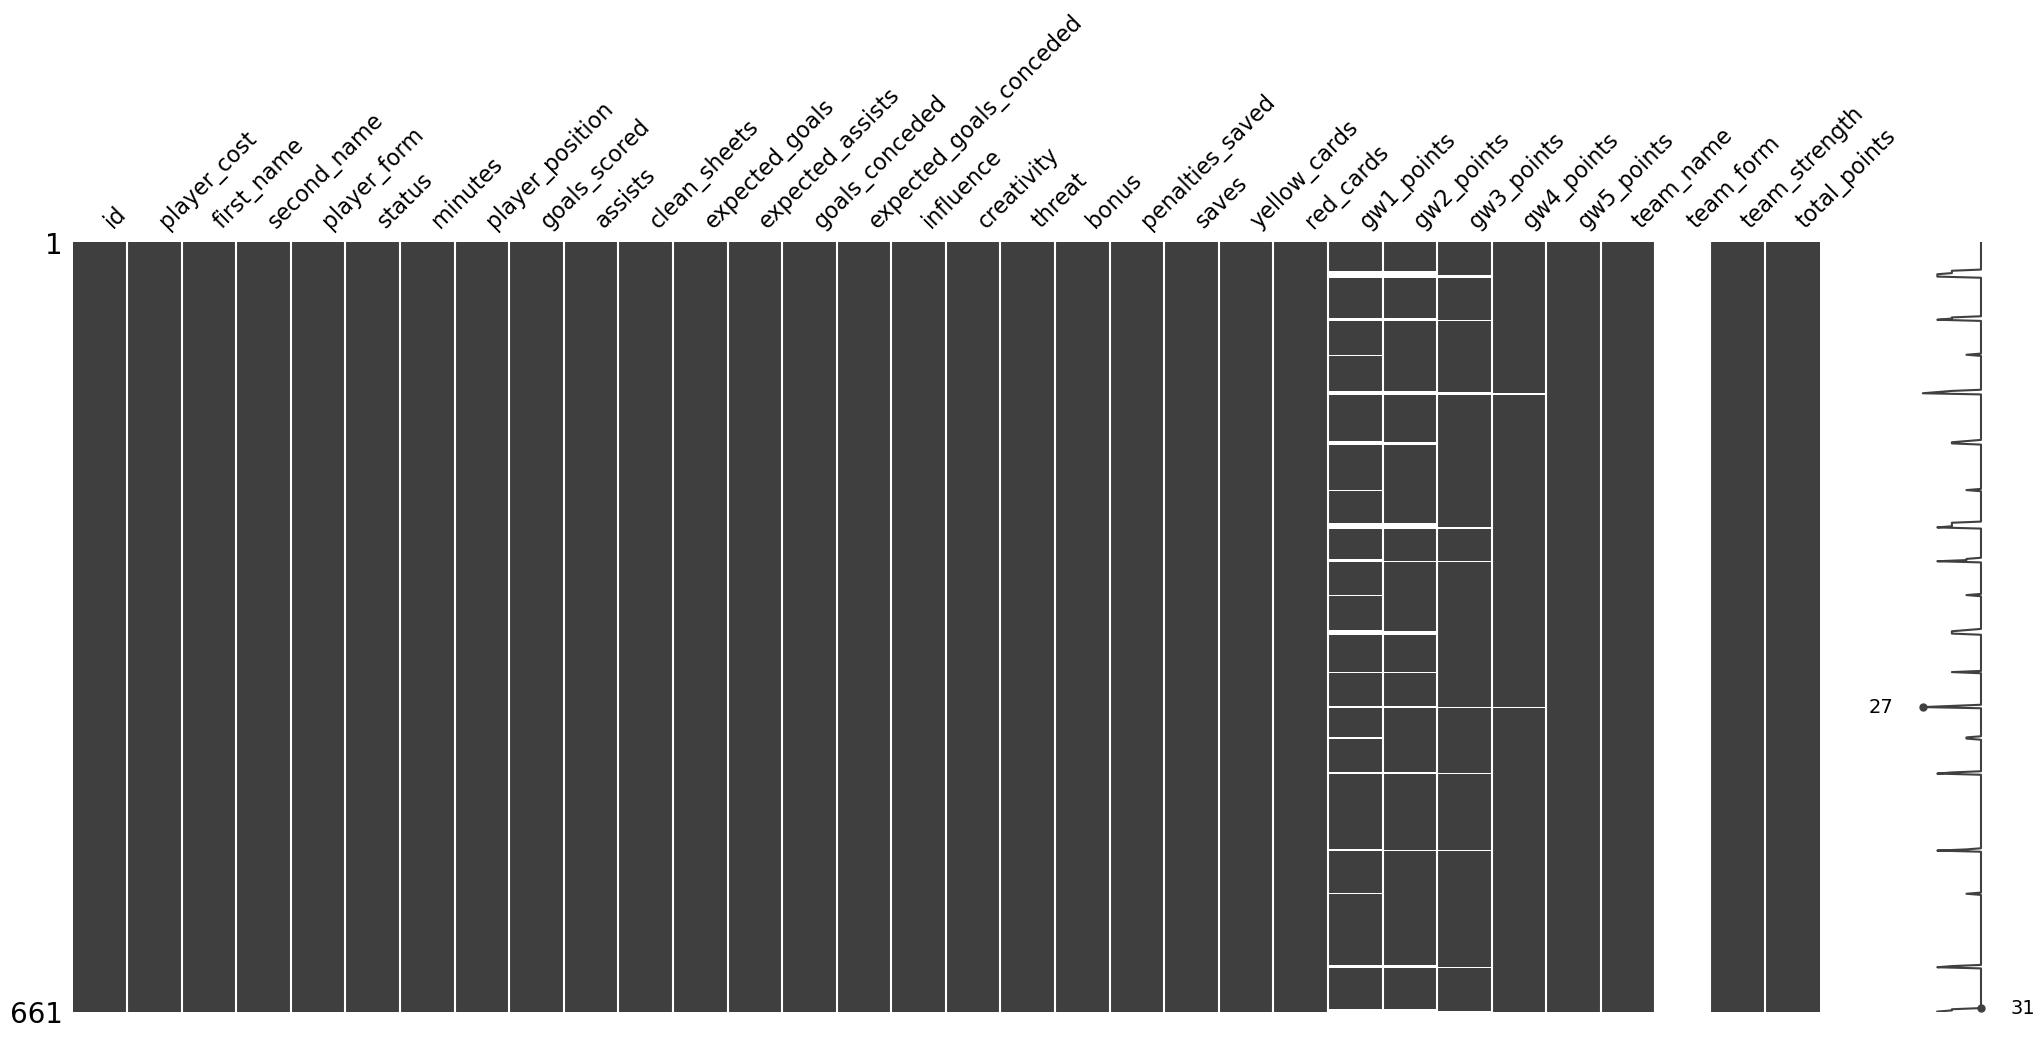

In [14]:
msno.matrix(df) 

In [16]:
df = df.drop(columns=['team_form']) 
print("team_form dropped")

team_form dropped


<Axes: >

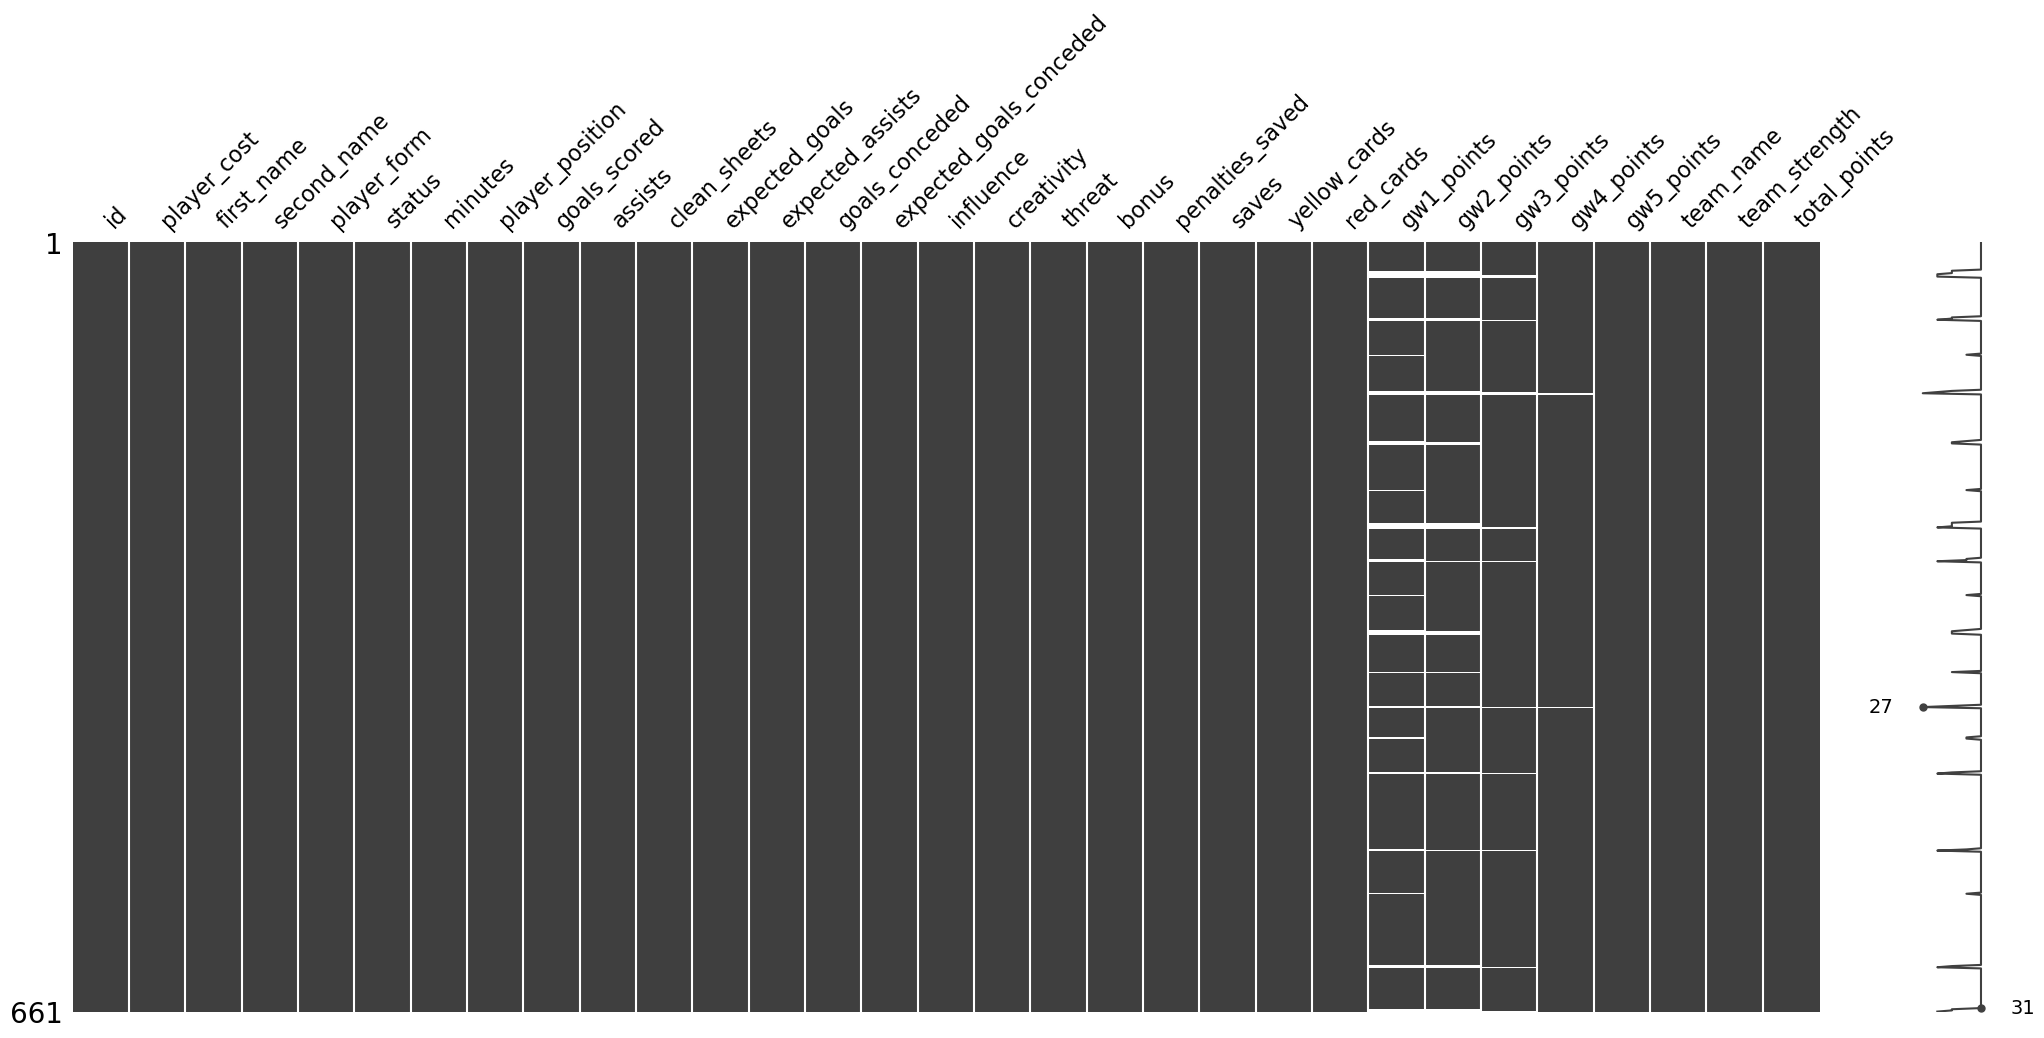

In [17]:
msno.matrix(df)

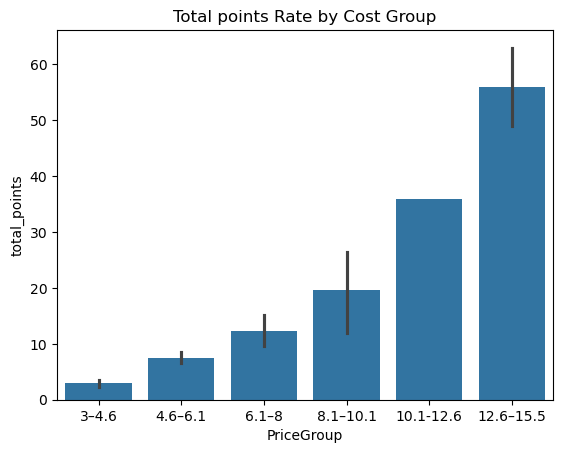

In [18]:
bins = [3, 4.6, 6.1, 8.1, 10.1, 12.6, 15.5] 
labels = ['3–4.6', '4.6–6.1', '6.1–8', '8.1–10.1', '10.1-12.6', '12.6–15.5'] 

df['PriceGroup'] = pd.cut(df['player_cost'], bins=bins, labels=labels) 
sns.barplot(data=df, x='PriceGroup', y='total_points',estimator='mean') 
plt.title('Total points Rate by Cost Group') 
plt.show() 

In [20]:
isnull = df.isnull().sum() 
isnull[isnull>0]

gw1_points    45
gw2_points    34
gw3_points    13
gw4_points     2
dtype: int64

In [21]:
df.loc[df["second_name"] == "Salah"]

,id,player_cost,first_name,second_name,player_form,status,minutes,player_position,goals_scored,assists,...,red_cards,gw1_points,gw2_points,gw3_points,gw4_points,gw5_points,team_name,team_strength,total_points,PriceGroup
387,328,12.8,Mohamed,Salah,8.8,Available,442,MID,3,4,...,0,14.0,10.0,17.0,2.0,6.0,Liverpool,4,49.0,12.6–15.5


In [14]:
df.columns.tolist()

['id',
 'player_cost',
 'first_name',
 'second_name',
 'player_form',
 'status',
 'minutes',
 'player_position',
 'goals_scored',
 'assists',
 'clean_sheets',
 'expected_goals',
 'expected_assists',
 'goals_conceded',
 'expected_goals_conceded',
 'influence',
 'creativity',
 'threat',
 'bonus',
 'penalties_saved',
 'saves',
 'yellow_cards',
 'red_cards',
 'gw1_points',
 'gw2_points',
 'gw3_points',
 'gw4_points',
 'gw5_points',
 'team_name',
 'team_strength',
 'total_points',
 'PriceGroup']

In [22]:
group_by_team = df.groupby('team_name')['first_name'].agg(list)
print(group_by_team)

team_name
Arsenal           [Fábio, Gabriel, Gabriel, Kai, Karl, Jurriën, ...
Aston Villa       [Leon, Ross, Enzo, Emiliano, Matty, Leander, M...
Bournemouth       [Max, Tyler, Jaidon, David, Ryan, Lewis, Enes,...
Brentford         [Kristoffer, Ethan, Nathan, Mikkel, Josh, Mark...
Brighton          [Simon, Benicio, Carlos, Valentín, Amario, Mah...
Chelsea           [Andrey, Ângelo Gabriel, Benoît, Lucas, Marcus...
Crystal Palace    [Eddie, Trevoh, Naouirou, Cheick, Chris, Chadi...
Everton           [Armando, Abdoulaye, Norberto Bercique, Jarrad...
Fulham            [Reiss, Emile, Joachim, Adama, Andreas, Calvin...
Ipswich           [Ali, Elkan, Nathan, Cameron, Wes, Conor, Harr...
Leicester         [Facundo, Jordan, Odsonne, Boubakary, Tom, Ham...
Liverpool         [Alisson, Trent, Stefan, Conor, Bobby, Darwin,...
Man City          [Manuel, Nathan, Bernardo, Oscar, Scott, Kevin...
Man Utd           [Amad, Antony Matheus, Bruno, Altay, Carlos He...
Newcastle         [Alex, Miguel, Harve

In [23]:
group_by_team_and_position = df.groupby('team_name')[['first_name', 'player_position']].agg(list)
print(group_by_team_and_position)

                                                       first_name  \
team_name                                                           
Arsenal         [Fábio, Gabriel, Gabriel, Kai, Karl, Jurriën, ...   
Aston Villa     [Leon, Ross, Enzo, Emiliano, Matty, Leander, M...   
Bournemouth     [Max, Tyler, Jaidon, David, Ryan, Lewis, Enes,...   
Brentford       [Kristoffer, Ethan, Nathan, Mikkel, Josh, Mark...   
Brighton        [Simon, Benicio, Carlos, Valentín, Amario, Mah...   
Chelsea         [Andrey, Ângelo Gabriel, Benoît, Lucas, Marcus...   
Crystal Palace  [Eddie, Trevoh, Naouirou, Cheick, Chris, Chadi...   
Everton         [Armando, Abdoulaye, Norberto Bercique, Jarrad...   
Fulham          [Reiss, Emile, Joachim, Adama, Andreas, Calvin...   
Ipswich         [Ali, Elkan, Nathan, Cameron, Wes, Conor, Harr...   
Leicester       [Facundo, Jordan, Odsonne, Boubakary, Tom, Ham...   
Liverpool       [Alisson, Trent, Stefan, Conor, Bobby, Darwin,...   
Man City        [Manuel, Nathan, B

In [24]:
for i in range(1,5):
    week_points = 'gw'+str(i)+'_points'
    group_means = df[week_points] = df[week_points].fillna(
    df.groupby(['team_name', 'player_position','PriceGroup'],observed=False)[week_points].transform('mean'))

isnull = df.isnull().sum() 
isnull[isnull>0]

gw1_points    2
gw2_points    1
dtype: int64

In [27]:
df['gw1_points'] = df['gw1_points'].fillna(0)
df['gw2_points'] = df['gw2_points'].fillna(0)

<Axes: >

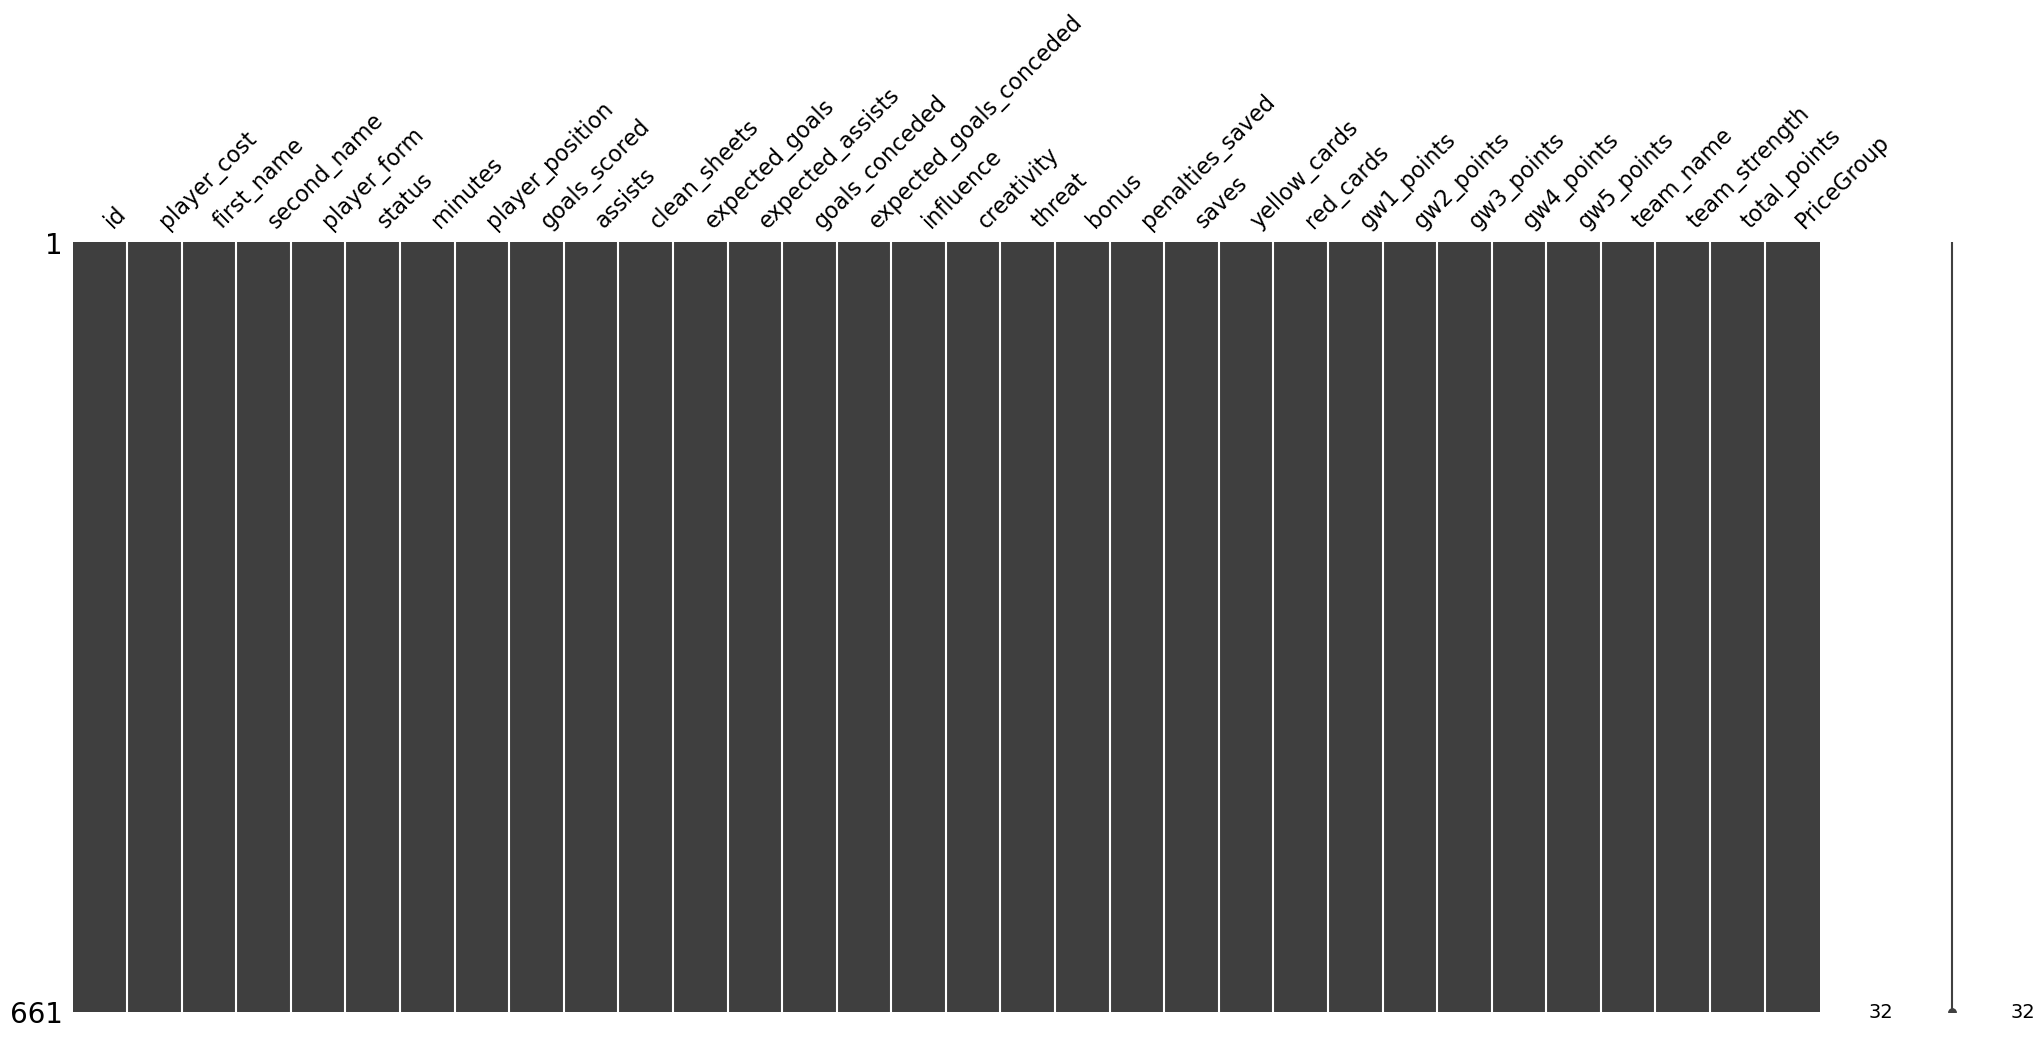

In [28]:
msno.matrix(df) 